In [1]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

jigsaw-toxic-comment-classification-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# !unzip jigsaw-toxic-comment-classification-challenge.zip -d data

In [3]:
import pandas as pd

In [4]:
raw_df = pd.read_csv('data/train.csv.zip')
test_df = pd.read_csv('data/test.csv.zip')
sub_df = pd.read_csv('data/sample_submission.csv.zip')

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
raw_df.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
77758,d041ed129ee8036c,""":::Unless I'm reading the history wrong, WM1 ...",0,0,0,0,0,0
147281,39b8c12337d53afa,Should this page be moved? \n\nI'm not sure ho...,0,0,0,0,0,0
99632,15068e51e05d3e1c,faggot \n\nyou are a faggot and mother fucker....,1,1,1,0,1,0
51403,89853cd76250852f,"yes it did make the album, it is track 15, and...",0,0,0,0,0,0
41467,6e9e5272780822c5,"""\n\n Talk page maintenance \n\nThis talk page...",0,0,0,0,0,0
158997,f6fc09337776242e,(I've already discussed WarriorsPride6565 here...,0,0,0,0,0,0
49656,84c57160394806bc,(I hate free speech it is shit.),1,0,1,0,0,0
136206,d8a14b96ae9dfe5e,"I agree, but the problem is that HolyRoman kee...",0,0,0,0,0,0
96582,048fecb3151a1eb3,"could put graphemes all over my name, it would...",0,0,0,0,0,0
97555,09e7da03366ce9de,"Stop spread this russian bullshit propaganda, ...",1,0,1,0,0,1


In [7]:
raw_df.comment_text.values[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [8]:
target_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [9]:
for col in target_cols:
    print(raw_df[col].value_counts(normalize=True))

toxic
0    0.904156
1    0.095844
Name: proportion, dtype: float64
severe_toxic
0    0.990004
1    0.009996
Name: proportion, dtype: float64
obscene
0    0.947052
1    0.052948
Name: proportion, dtype: float64
threat
0    0.997004
1    0.002996
Name: proportion, dtype: float64
insult
0    0.950636
1    0.049364
Name: proportion, dtype: float64
identity_hate
0    0.991195
1    0.008805
Name: proportion, dtype: float64


In [10]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [11]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


## Prepare the Dataset for Training

Outline:
- Create a vocabulary using TorchText
- Create training & validation sets
- Create PyTorch dataloaders

In [12]:
from torchtext.data.utils import get_tokenizer

In [13]:
tokenizer = get_tokenizer('basic_english')

In [14]:
sample_comment = raw_df.comment_text.values[0]

In [15]:
sample_comment

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [16]:
sample_comment_tokens = tokenizer(sample_comment)

In [17]:
sample_comment_tokens[:15]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'were',
 'reverted',
 '?',
 'they']

In [18]:
from torchtext.vocab import build_vocab_from_iterator

In [19]:
comment_tokens = raw_df.comment_text.map(tokenizer)

In [20]:
comment_tokens

0         [explanation, why, the, edits, made, under, my...
1         [d, ', aww, !, he, matches, this, background, ...
2         [hey, man, ,, i, ', m, really, not, trying, to...
3         [more, i, can, ', t, make, any, real, suggesti...
4         [you, ,, sir, ,, are, my, hero, ., any, chance...
                                ...                        
159566    [and, for, the, second, time, of, asking, ,, w...
159567    [you, should, be, ashamed, of, yourself, that,...
159568    [spitzer, umm, ,, theres, no, actual, article,...
159569    [and, it, looks, like, it, was, actually, you,...
159570    [and, ., ., ., i, really, don, ', t, think, yo...
Name: comment_text, Length: 159571, dtype: object

In [21]:
VOCAB_SIZE = 1500

In [22]:
unk_token = '<unk>'
pad_token = '<pad>'

In [23]:

vocab = build_vocab_from_iterator(comment_tokens,
                                  specials= [unk_token , pad_token],
                                  max_tokens=VOCAB_SIZE)

In [24]:
vocab.set_default_index(vocab[unk_token])

In [25]:
vocab['harcore']

0

In [26]:
vocab['this']

18

In [27]:
sample_indices = vocab.lookup_indices(sample_comment_tokens)[:10]
sample_indices

[667, 85, 3, 140, 142, 185, 39, 663, 0, 0]

In [28]:
sample_comment_recovered = vocab.lookup_tokens(sample_indices)
sample_comment_recovered

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 '<unk>',
 '<unk>']

### Create Training & Validation Sets

- Define a custom Pytorch Dataset
- Pass raw data into the dataset
- Split the PyTorch Dataset

<Axes: ylabel='Frequency'>

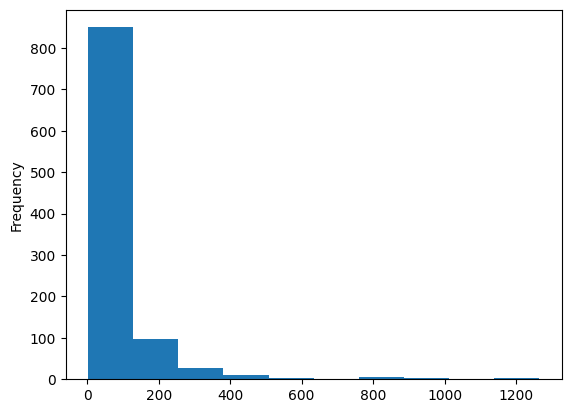

In [29]:
raw_df.comment_text.sample(1000).map(tokenizer).map(len).plot(kind='hist')

In [30]:
MAX_LENGTH = 150

In [31]:
def pad_tokens(tokens):
    if (len(tokens) >= MAX_LENGTH):
        return tokens[:MAX_LENGTH]
    else:
        return tokens + [pad_token] * (MAX_LENGTH - len(tokens))

In [32]:
from torch.utils.data import Dataset
import torch

In [33]:
class JigsawDataset(Dataset):
    def __init__(self, df, is_test=False):
        self.df = df
        self.is_test = is_test

    def __getitem__(self, index):
        comment_text = self.df.comment_text.values[index]
        comment_tokens = pad_tokens(tokenizer(comment_text))
        input = torch.tensor(vocab.lookup_indices(comment_tokens))
        if self.is_test:
            target = torch.tensor([0,0,0,0,0,0]).float()
        else:
            target = torch.tensor(self.df[target_cols].values[index]).float()
        return input, target

    def __len__(self):
        return len(self.df)

In [34]:
raw_ds = JigsawDataset(raw_df)

In [35]:
raw_df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [36]:
raw_ds[0]

(tensor([ 667,   85,    3,  140,  142,  185,   39,  663,    0,    0, 1287,   96,
          329,   27,   57,    0,    9,   31,    0,    4,   61,    0,   21,   71,
            0,  158,    6,    0,   45,  130, 1167,    0,    0,    2,    8,   55,
           70,    9,   31,  253,    3,  369,   41,    3,   50,   38,  155,    6,
            9,   81,    0,   99,    2,    0,    2,    0,    2,    0,    2, 1122,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

In [37]:
from torch.utils.data import random_split

In [38]:
VAL_FRAC = 0.25

In [39]:
train_ds, val_ds = random_split(raw_ds, [1-VAL_FRAC, VAL_FRAC])

In [40]:
len(raw_ds), len(train_ds), len(val_ds)

(159571, 119679, 39892)

In [41]:
test_ds = JigsawDataset(test_df, is_test=True)

In [42]:
test_df.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [43]:
test_ds[0]

(tensor([   0,  636,    0,  649,   12,   69,    0,   93,   10,    9,  169,  359,
           23,    0,   89,   30,   10,    8,    0,   10, 1488,    0,    2,    2,
            2,    6,   68,  636,    0,    0,    0,  690,    0,    8,  105,   10,
            5,    0,   39,  419,   10,  699,    0,   46,    2,    0,  649,   12,
           47,    0,   15,    0,  668,  439,    2,  443,    0,   13,  332,   21,
          167,    2,    8,    0,   12,  251,    0,   62,    0,   59,   34,   11,
            0,  171,    2,    2,    2,    0,  690,    0,  105,  226,  160,  490,
           95,    2,    4,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

### Create PyTorch Dataloaders

In [44]:
from torch.utils.data import DataLoader

In [45]:
BATCH_SIZE = 256 #Decrease if you have less ram 

In [46]:
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE*2, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE*2, pin_memory=True)

In [47]:
train_dl

In [48]:
# for batch in train_dl:
#     b_inputs, b_targets = batch
#     print('b_input.shape', b_inputs.shape)
#     print('b_targets.shape', b_targets.shape)
#     break

## Build a Recurrent Neural Network

Outline:
1. Understand how recurrent neural networks work
2. Create a recurrent neural network
3. Pass some through the network

In [49]:
import torch.nn as nn
import torch.functional as F

In [50]:
vocab[pad_token]

1

In [51]:
emb_layer = nn.Embedding(VOCAB_SIZE , 256 , 1)

In [52]:
rnn_layer = nn.RNN(256, 128, 1, batch_first=True)

In [53]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)

    emb_out = emb_layer(b_inputs)
    print('emb_out.shape', emb_out.shape)

    rnn_out, hn = rnn_layer(emb_out)
    print('rnn_out.shape', rnn_out.shape)
    print('hn.shape', hn.shape)

    break

b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])
emb_out.shape torch.Size([256, 150, 256])
rnn_out.shape torch.Size([256, 150, 128])
hn.shape torch.Size([1, 256, 128])


In [54]:
!pip install pytorch_lightning --quiet

In [56]:
import pytorch_lightning as pl
import torch.nn.functional as F
import numpy as np

In [138]:
# class JigsawModel(pl.LightningModule):
#     def __init__(self):
#         super().__init__()
#         self.emb = nn.Embedding(VOCAB_SIZE, 256, 1)
#         self.lstm = nn.LSTM(256, 128, 1, batch_first=True)
#         self.linear = nn.Linear(128, 6)
#         self.learning_rate = 0.005

#     def forward(self, x):
#         out = self.emb(x)
#         out, hn = self.lstm(out)
#         out = F.relu(out[:,-1,:])
#         out = self.linear(out)
#         return out

#     def training_step(self, batch, batch_idx):
#         inputs, targets = batch
#         outputs = self(inputs)
#         probs = torch.sigmoid(outputs)
#         loss = F.binary_cross_entropy(probs, targets)
#         return loss

#     def validation_step(self, batch, batch_idx):
#         inputs, targets = batch
#         outputs = self(inputs)
#         probs = torch.sigmoid(outputs)
#         loss = F.binary_cross_entropy(probs, targets)
#         return {"val_loss":loss}

#     def on_validation_epoch_end(self, validation_step_outputs):
#         avg_loss = torch.stack([x["val_loss"] for x in validation_step_outputs]).mean()
#         print("Epoch #{}; Loss: {:4f} ".format(self.current_epoch, avg_loss)) 

#     def predict_step(self, batch, batch_idx):
#         inputs, targets = batch
#         outputs = self(inputs)
#         probs = torch.sigmoid(outputs)
#         return probs       

#     def configure_optimizers(self):
#         return torch.optim.Adam(self.parameters(), lr=self.learning_rate)
class JigsawModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.emb = nn.Embedding(VOCAB_SIZE, 256, 1)
        self.lstm = nn.LSTM(256, 128, 1, batch_first=True)
        self.linear = nn.Linear(128, 6)
        self.learning_rate = 0.005
        self.validation_step_outputs = []  # Initialize the list

    def forward(self, x):
        out = self.emb(x)
        out, hn = self.lstm(out)
        out = F.relu(out[:, -1, :])
        out = self.linear(out)
        return out

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        loss = F.binary_cross_entropy(probs, targets)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        loss = F.binary_cross_entropy(probs, targets)
        self.validation_step_outputs.append(loss)
        return {"val_loss": loss}

    def on_validation_epoch_end(self):
        avg_loss = torch.stack(self.validation_step_outputs).mean()
        print("Epoch #{}; Loss: {:4f} ".format(self.current_epoch, avg_loss))
        self.validation_step_outputs.clear()  # Clear list after each epoch

    def predict_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        return probs       

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)



In [139]:
model = JigsawModel()

In [140]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)

    outputs = model(b_inputs)
    print('outputs.shape', outputs.shape)

    probs = torch.sigmoid(outputs)
    loss = F.binary_cross_entropy(probs, b_targets)
    print('Loss', loss)
    break

b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])
outputs.shape torch.Size([256, 6])
Loss tensor(0.7024, grad_fn=<BinaryCrossEntropyBackward0>)


In [141]:
trainer = pl.Trainer(max_epochs=3, accelerator='gpu')

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


In [142]:
model.learning_rate

0.005

In [143]:
trainer.fit(model, train_dl, val_dl)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name   | Type      | Params
-------------------------------------
0 | emb    | Embedding | 384 K 
1 | lstm   | LSTM      | 197 K 
2 | linear | Linear    | 774   
-------------------------------------
582 K     Trainable params
0         Non-trainable params
582 K     Total params
2.330     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

C:\Users\deeks\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch #0; Loss: 0.702465 


C:\Users\deeks\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #0; Loss: 0.065997 


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #1; Loss: 0.062812 


Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch #2; Loss: 0.060468 


## Make Predictions & Submit

In [144]:
test_df.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [145]:
for batch in test_dl:
    b_inputs, b_targets = batch
    print('b_inputs.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)
    break

b_inputs.shape torch.Size([512, 150])
b_targets.shape torch.Size([512, 6])


In [146]:
test_preds = trainer.predict(model, test_dl)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\deeks\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

In [147]:
test_preds = torch.cat(test_preds)

In [148]:
test_preds.shape

torch.Size([153164, 6])

In [149]:
test_preds

tensor([[9.7865e-01, 1.8919e-01, 8.9492e-01, 3.4187e-02, 7.8373e-01, 1.1065e-01],
        [8.8006e-03, 4.1497e-05, 1.7131e-03, 3.6584e-04, 1.7964e-03, 6.6555e-04],
        [6.3809e-03, 3.0826e-05, 1.3422e-03, 1.9932e-04, 1.5872e-03, 4.3076e-04],
        ...,
        [6.1045e-03, 2.0957e-05, 1.1475e-03, 1.4098e-04, 1.5204e-03, 4.0540e-04],
        [7.2412e-03, 2.2938e-05, 1.2870e-03, 1.8645e-04, 1.7328e-03, 4.7305e-04],
        [9.6640e-01, 1.2393e-01, 8.5229e-01, 3.6112e-02, 6.8954e-01, 7.8510e-02]])

In [150]:
test_probs = torch.sigmoid(test_preds)

In [151]:
sub_df[target_cols] = test_probs.detach().cpu().numpy()

In [152]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.726840,0.547157,0.709904,0.508546,0.686482,0.527634
1,0000247867823ef7,0.502200,0.500010,0.500428,0.500091,0.500449,0.500166
2,00013b17ad220c46,0.501595,0.500008,0.500336,0.500050,0.500397,0.500108
3,00017563c3f7919a,0.501236,0.500005,0.500252,0.500044,0.500277,0.500088
4,00017695ad8997eb,0.501916,0.500008,0.500390,0.500066,0.500403,0.500116
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.512604,0.500075,0.502455,0.500287,0.502237,0.500539
153160,fffd7a9a6eb32c16,0.515885,0.500103,0.502446,0.500377,0.504236,0.500784
153161,fffda9e8d6fafa9e,0.501526,0.500005,0.500287,0.500035,0.500380,0.500101
153162,fffe8f1340a79fc2,0.501810,0.500006,0.500322,0.500047,0.500433,0.500118


In [153]:
sub_df.to_csv('submission.csv',index = None)

In [162]:
sample_df = raw_df.sample(20)

In [163]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
24713,4153ff53c2bdede3,""" (UTC)\n\nI do think it's worth adding a crit...",0,0,0,0,0,0
102059,2234f16935b4cd12,Editor at Large have done very nice work!,0,0,0,0,0,0
157978,e6cbf433b00d2419,PDP-11's Influence on the Design of C\n\nAt th...,0,0,0,0,0,0
26452,461425210a2b8f74,harass me will be reported. 23:51,0,0,0,0,0,0
62282,a6a917ad88ebaf4c,"Courtesy ping \n\nHi Dennis,\n\nRE: \n\nIn my ...",0,0,0,0,0,0
146554,2e067d3be9ab85c2,Good article\n\nNice to see an article with ci...,0,0,0,0,0,0
18819,31a824c456ad44ba,"""\n\n""""manage to play nicer with others""""? do ...",0,0,0,0,0,0
37497,642701583b0cc86b,wikipedia loves cock \n\nwikipedia loves cock ...,1,1,1,0,0,0
93131,f903c3840c9dc0fb,"""\n\nI've relabeled it the """"Current version""""...",0,0,0,0,0,0
30252,50523f714430afbd,"Greetings, nice work for a start! The article ...",0,0,0,0,0,0


In [164]:
sample_ds = JigsawDataset(sample_df)

In [165]:
sample_dl = DataLoader(sample_ds, batch_size=10)

In [166]:
sample_preds = trainer.predict(model, sample_dl)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\deeks\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

In [167]:
sample_probs = torch.sigmoid(sample_preds[0])

In [168]:
sample_probs

tensor([[0.5424, 0.5001, 0.5103, 0.5001, 0.5054, 0.5004],
        [0.5020, 0.5000, 0.5005, 0.5001, 0.5003, 0.5001],
        [0.5013, 0.5000, 0.5003, 0.5000, 0.5003, 0.5001],
        [0.5152, 0.5001, 0.5025, 0.5005, 0.5039, 0.5008],
        [0.5021, 0.5000, 0.5004, 0.5001, 0.5005, 0.5002],
        [0.5012, 0.5000, 0.5003, 0.5000, 0.5003, 0.5001],
        [0.5071, 0.5004, 0.5019, 0.5004, 0.5014, 0.5005],
        [0.7264, 0.6358, 0.7161, 0.5224, 0.7041, 0.5587],
        [0.5013, 0.5000, 0.5003, 0.5000, 0.5003, 0.5001],
        [0.5020, 0.5000, 0.5004, 0.5001, 0.5003, 0.5001]])

In [169]:
(sample_probs > 0.6).int()

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [170]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
24713,4153ff53c2bdede3,""" (UTC)\n\nI do think it's worth adding a crit...",0,0,0,0,0,0
102059,2234f16935b4cd12,Editor at Large have done very nice work!,0,0,0,0,0,0
157978,e6cbf433b00d2419,PDP-11's Influence on the Design of C\n\nAt th...,0,0,0,0,0,0
26452,461425210a2b8f74,harass me will be reported. 23:51,0,0,0,0,0,0
62282,a6a917ad88ebaf4c,"Courtesy ping \n\nHi Dennis,\n\nRE: \n\nIn my ...",0,0,0,0,0,0
146554,2e067d3be9ab85c2,Good article\n\nNice to see an article with ci...,0,0,0,0,0,0
18819,31a824c456ad44ba,"""\n\n""""manage to play nicer with others""""? do ...",0,0,0,0,0,0
37497,642701583b0cc86b,wikipedia loves cock \n\nwikipedia loves cock ...,1,1,1,0,0,0
93131,f903c3840c9dc0fb,"""\n\nI've relabeled it the """"Current version""""...",0,0,0,0,0,0
30252,50523f714430afbd,"Greetings, nice work for a start! The article ...",0,0,0,0,0,0
